In [4]:
!pip install numpy
!pip install h5py

   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   --------------------------- ------------ 2.1/3.0 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 3.0/3.0 MB 9.7 MB/s eta 0:00:00


In [11]:
import h5py
import numpy as np


def load_data():
    train_dataset = h5py.File('dataset/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('dataset/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

x_train, y_train, x_test, y_test = load_data()

In [12]:

# Normalize image vectors
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

# Normalize labels pas necessaire car les labels sont déjà normalisés
# flatten les image
x_train = x_train.reshape(x_train.shape[0], -1)  # 64x64 = 4096 ou -1 pour laisser numpy calculer
x_test = x_test.reshape(x_test.shape[0], -1)

# afficher les dimensions
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
#affichage max
print("x_train max:", x_train.max())
print("x_test max:", x_test.max())

x_train shape: (1000, 4096)
y_train shape: (1000, 1)
x_test shape: (200, 4096)
y_test shape: (200, 1)
x_train max: 1.0
x_test max: 1.0


In [13]:
# generer random weights et bias
w = np.random.randn(4096, 1)
b = np.random.randn(1)

# afficher les dimensions
print("w shape:", w.shape)
print("b shape:", b.shape)

# initialiser w et b
def initialize_with_zeros(nb_weights=4096):
    w = np.random.randn(nb_weights, 1)
    b = np.random.randn(1)
    return w, b

w shape: (4096, 1)
b shape: (1,)


In [15]:
!pip install torch

In [16]:
#!pip install matplotlib
!pip install scikit-learn


In [14]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

In [108]:
!pip install tqdm

  0%|          | 0/10000 [00:00<?, ?it/s]

Epoch 0 - loss: 7.477188553215995


  5%|▌         | 519/10000 [00:07<01:31, 104.03it/s]

Epoch 500 - loss: 3.4755636831120555


 10%|█         | 1011/10000 [00:12<01:28, 102.11it/s]

Epoch 1000 - loss: 2.9899584615908767


 15%|█▌        | 1518/10000 [00:17<01:14, 113.63it/s]

Epoch 1500 - loss: 2.676864634745283


 20%|██        | 2011/10000 [00:22<01:14, 107.01it/s]

Epoch 2000 - loss: 2.4506805752994154


 25%|██▌       | 2523/10000 [00:27<01:05, 113.41it/s]

Epoch 2500 - loss: 2.270505128212442


 30%|███       | 3013/10000 [00:32<00:59, 117.02it/s]

Epoch 3000 - loss: 2.116923754460312


 35%|███▌      | 3524/10000 [00:37<00:53, 120.21it/s]

Epoch 3500 - loss: 1.9821434807104965


 40%|████      | 4014/10000 [00:42<00:53, 112.82it/s]

Epoch 4000 - loss: 1.8617414426264396


 45%|████▌     | 4512/10000 [00:47<00:53, 103.48it/s]

Epoch 4500 - loss: 1.7530673139045438


 50%|█████     | 5010/10000 [00:52<00:45, 109.49it/s]

Epoch 5000 - loss: 1.6543829811104498


 55%|█████▌    | 5516/10000 [00:58<00:43, 102.66it/s]

Epoch 5500 - loss: 1.564480453213942


 60%|██████    | 6011/10000 [01:03<00:40, 98.28it/s] 

Epoch 6000 - loss: 1.4824203369706397


 65%|██████▌   | 6523/10000 [01:08<00:33, 105.01it/s]

Epoch 6500 - loss: 1.4072874135723588


 70%|███████   | 7014/10000 [01:13<00:31, 95.68it/s] 

Epoch 7000 - loss: 1.3381660280756138


 75%|███████▌  | 7510/10000 [01:18<00:23, 105.62it/s]

Epoch 7500 - loss: 1.2742845198933606


 80%|████████  | 8012/10000 [01:23<00:18, 105.58it/s]

Epoch 8000 - loss: 1.2151102474359874


 85%|████████▌ | 8520/10000 [01:28<00:13, 113.50it/s]

Epoch 8500 - loss: 1.1602366511087485


 90%|█████████ | 9018/10000 [01:33<00:09, 100.75it/s]

Epoch 9000 - loss: 1.1091814433480767


 95%|█████████▌| 9518/10000 [01:38<00:04, 102.67it/s]

Epoch 9500 - loss: 1.0614415244345323


100%|██████████| 10000/10000 [01:43<00:00, 96.52it/s]


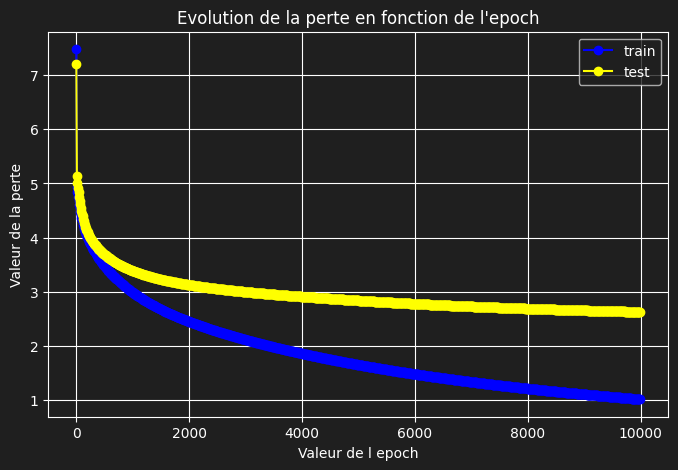

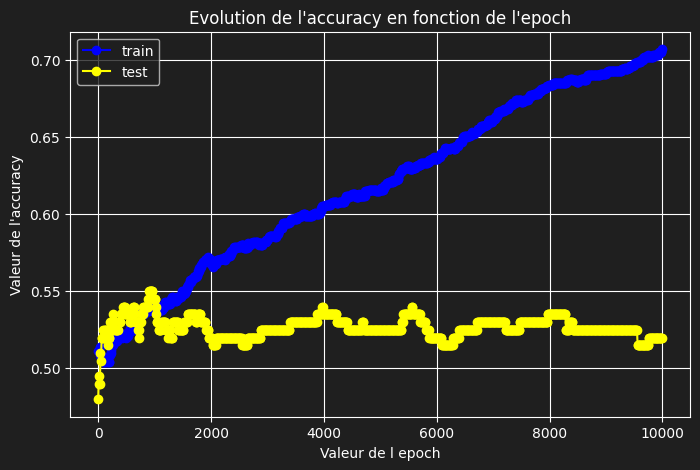

Accuracy: 0.52


In [15]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import tqdm as tqdm

def model(X, w, b):
    """
    fonction qui prédit la classe d'une image
    @param X: image flatten
    @param w: poids
    @param b: bias
    @return: probabilité que l'image appartienne à la classe 1
    """
    z = X.dot(w) + b # produit matriciel et b use broadcasting pour combler b
    a = 1 / (1 + np.exp(-z)) # sigmoid car je veux une probabilité entre 0 et 1 (deux classes : si < 0.5 alors 0 sinon 1)
    return a

def log_loss(a, y):
    """
    Calcule la log loss (cross-entropie binaire) en utilisant numpy.
    @param a: Probabilité que l'image appartienne à la classe 1 (tableau numpy)
    @param y: Classe réelle de l'image (tableau numpy)
    @return: Log loss
    """
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(a + epsilon) - (1 - y) * np.log(1 - a + epsilon))

def gradient(X, A, y):
    """Fonction qui calcule le gradient de la fonction de cout par rapport à w et b en utilsant le principe de la chaine afin de decomposer le calcule de depart qui est derive du cout par rapport a w ou b car effectivmenet, on a pas directement w1 et b dans la fonctio nde cout donc on doit decomposer le calcule(voir explication plus bas).
    @param X: image flatten
    @param a: probabilité que l'image appartienne à la classe 1
    @param y: vraie classe de l'image
    @return: matrice des gradient de la fonction de cout par rapport à w et idem pour b
    ca nous donne les gradient pour chaque poids et bias qu servi a mettre a jour les poids et bias plus tard
    """
    # derive de la fonction de cout par rapport à w et b calculé au prealable et ca donne ca
    # attention, si la fonction de perte/cout change ou que la fonction d activation change, il faut recalculer le gradient ou use pytorch, autograd ou keras qui le fait otut seul
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

def update(dW, db, W, b, learning_rate):
    """
    fonction qui met à jour les poids et le bias
    @param dW: gradient de la fonction de cout par rapport à w
    @param db: gradient de la fonction de cout par rapport à b
    @param W: poids
    @param b: bias
    @param learning_rate: taux d'apprentissage (pas donc la vitesse a laquelle on apprend)
    @return: nouveaux poids et bias
    """
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

def predict(x, w, b):
    """
    fonction qui va predire pour chque image si elle appartient à la classe 1 ou 0 et redonne une matrice
    @param x: image flatten 
    @param w: poids
    @param b: bias
    @return: classe prédite
    """
    # prédire la classe
    A = model(x, w, b)
    # si la probabilité est supérieure à 0.5, on prédit 1 sinon 0
    return A >= 0.5

def train(X, y, x_test, y_test, learning_rate, epochs=1000):
    """
    fonction qui entraine le modèle
    @param X: images flatten
    @param y: vraies classes des images
    @param w: poids
    @param b: bias
    @param learning_rate: taux d'apprentissage
    @param epochs: nombre d'itérations
    @return: poids et bias entrainés
    """
    # init model
    loss_values_train = []
    loss_values_test = []
    accuracy_values_test = []
    accuracy_values_train = []
    w, b = initialize_with_zeros(X.shape[1])
    # boucle d entrainement
    for epoch in tqdm.tqdm(range(epochs)):
        # prédire la classe
        A = model(X, w, b)
        # calculer la fonction de cout
        loss = log_loss(A, y)
        # calculer le gradient
        dW, db = gradient(X, A, y)
        # mettre à jour les poids
        w, b = update(dW, db, w, b, learning_rate)

        # afficher la loss et epoch toute les 500 epochs
        if epoch % 500 == 0:
            print(f"Epoch {epoch} - loss: {loss}")
        # save accuracy test and train
        # faire les affichages des qu on a un multiple de 10
        if epoch % 10 == 0:
            a_test = model(x_test, w, b)
            accuracy_values_test.append((accuracy_score(y_test, a_test>=0.5), epoch))
            accuracy_values_train.append((accuracy_score(y, A>=0.5), epoch))
            # save loss train and test
            loss_values_train.append((loss, epoch))
            loss_values_test.append((log_loss(a_test, y_test), epoch))
    return (w, b, loss_values_train, loss_values_test, accuracy_values_train, accuracy_values_test)

# --------------------------------entrainer le modèle----------------------------
w, b, loss_values_train, loss_values_test, accuracy_values_train, accuracy_values_test  = train(x_train, y_train, x_test, y_test, 0.01, 10000)

# afficher evolution loss train et test sur la meme courbe
# Créer la figure et tracer la courbe
plt.figure(figsize=(8, 5))  # Taille de la figure
plt.plot(np.array(loss_values_train)[:, 1:2], np.array(loss_values_train)[:, :1], label='train', linestyle='-', marker='o', color='blue')  # Tracer y en fonction de x
plt.plot(np.array(loss_values_test)[:, 1:2], np.array(loss_values_test)[:, :1], label='test', linestyle='-', marker='o', color='yellow')  # Tracer y en fonction de x

# Ajouter un titre et des labels
plt.title("Evolution de la perte en fonction de l'epoch")
plt.xlabel("Valeur de l epoch")
plt.ylabel("Valeur de la perte")

# Ajouter une légende
plt.legend()

# Afficher la grille pour faciliter la lecture du graphique
plt.grid(True)

# Afficher le graphique
plt.show()

# affficher evolution accuracy
# Créer la figure et tracer la courbe
plt.figure(figsize=(8, 5))  # Taille de la figure
plt.plot(np.array(accuracy_values_train)[:, 1:2], np.array(accuracy_values_train)[:, :1], label='train', linestyle='-', marker='o', color='blue')  # Tracer y en fonction de x
plt.plot(np.array(accuracy_values_test)[:, 1:2], np.array(accuracy_values_test)[:, :1], label='test', linestyle='-', marker='o', color='yellow')  # Tracer y en fonction de x

# Ajouter un titre et des labels
plt.title("Evolution de l'accuracy en fonction de l'epoch")
plt.xlabel("Valeur de l epoch")
plt.ylabel("Valeur de l'accuracy")

# Ajouter une légende
plt.legend()

# Afficher la grille pour faciliter la lecture du graphique
plt.grid(True)

# Afficher le graphique
plt.show()

# --------------------------------tester le modèle----------------------------
def predict_final(X, w, b, y):
    """
    fonction qui va donner la précision du modèle
    @param X: image flatten
    @param w: poids
    @param b: bias
    @param y: vraies classes des images
    @return: classe prédite
    """
    A = predict(X, w, b)
    # calculer la fonction de cout
    score_accuracy = accuracy_score(y, A)
    return score_accuracy

# tester le modèle
score_accuracy = predict_final(x_test, w, b, y_test)
print(f"Accuracy: {score_accuracy}")
    


    




In [ ]:
#On voit clairement que le modèle est overfitting car la loss sur le train set est bien plus basse que sur le test set. on le voit aussi sur la courbe d accuracy qui est bien plus haute sur le train set que sur le test set. 
# idealement, on devrait use la validation croise pour valider notre modele afin de tester differentes melange de set train/test au lieu de prendre juste tout le train afin d avoir une meilleur idee de la performance du modele. (j ai choisi ici de ne jamais montrer mes data de test au modele pour voir ca perf reel)